# 状態空間モデル

ARモデルやMAモデルなどの時系列モデルは状態空間モデルにより表現することができる．

$ x_n = M(x_{n-1}) + Gu_{n} $

$ y_n = Hx_n + w_n $

## 関連
`time_series_model.ipynb`

In [1]:
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## MAモデル
移動平均モデル
N次MAモデル
$ x_t = \epsilon_t + \sum_{i=1}^N \theta_i \epsilon_{t-i} + c$

ただし，$ \epsilon_t \sim N(0, \sigma) $

1次MAモデルは状態空間モデルでかくと
TODO:

## ARモデル

線形自己回帰モデル

$ x_t = \sum_{i=1}^N a_i x_{t-i} + \epsilon_t $

TODO:

## ARMA
$ x_t =  \epsilon_t + \sum_{i=1}^N a_i x_{t-i} + \sum_{i=1}^M \theta_j \epsilon_{t-j} + c$
 $

 TODO:

以下は参考

In [104]:
# ハイパーパラメータの設定
std = 1
sd_sys_t = std #システムノイズにおけるトレンド成分の標準偏差の推定値
sd_sys_s = std #システムノイズにおける周期成分(季節成分)の標準偏差の推定値
sd_obs = std/10 #観測ノイズの標準偏差の推定値
tdim = 2 #トレンドモデルの次元
period = 3 #周期の推定値
pdim = period - 1 #周期変動モデルの次元
#トレンドモデル
F1 = np.array([[2, -1], [1, 0]])
G1 = np.array([[1], [0]])

#トレンドモデルの観測モデル
H1 = np.array([[1, 0]])

#周期変動モデル
F2 = np.block([[-1*np.ones((1, pdim))], [np.eye(pdim-1), np.zeros((pdim-1, 1))]])
# F2 = np.array([
#     [-1, -1, -1, -1, -1, -1],
#     [+1,  0,  0,  0,  0,  0],
#     [ 0, +1,  0,  0,  0,  0],
#     [ 0,  0, +1,  0,  0,  0],
#     [ 0,  0,  0, +1,  0,  0],
#     [ 0,  0,  0,  0, +1,  0]])
G2 = np.zeros((pdim, 1))
G2[0,0] = 1

#周期変動モデルの観測モデル
H2 = np.zeros((1, pdim))
H2[0,0] = 1

#モデル全体
#システムモデル
F = np.block([[F1, np.zeros((tdim, pdim))], [np.zeros((pdim,tdim)), F2]])
M = lambda x,t: F@x
G = np.block([[G1, np.zeros((tdim,1))], [np.zeros((pdim,1)), G2]])
Q = np.array([[sd_sys_t**2, 0], [0, sd_sys_s**2]])
#観測モデル
H = np.block([[H1, H2]])
R = np.array([[sd_obs**2]])

#状態変数などの定義
# #データに関係ない初期値を格納するため N+1 個の配列を確保
dim = tdim + pdim #状態変数の次元

In [108]:
t0 = np.random.normal(loc=100, scale=sd_sys_t, size=tdim)
s0 = np.random.normal(loc=10, scale=sd_sys_s, size=pdim)
x0 = np.concatenate([t0,s0])
print(x0)
def generate_data(F, G, Q, H, N, x0):
    data = []
    state = x0
    data.append(H@state)
    for n in range(N):
        noise = np.random.multivariate_normal(np.zeros(2), Q)
        state = F@state + G@noise
        data.append(H@state)
    return np.array(data)

my_data = generate_data(F, G, Q, H, 1298, x0)

[100.43866747  99.22004202  10.42784484   8.29441248]


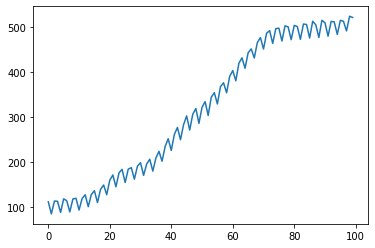

In [109]:
plt.plot(my_data[:100])